## Importing All required Libraries 

In [1]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib
from stockstats import StockDataFrame as Sdf
import quandl
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
from dtreeplt import dtreeplt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from missingpy import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import re
from sklearn.preprocessing import RobustScaler
from docx import Document
from docx.enum.style import WD_STYLE_TYPE
from docx.enum.table import WD_TABLE_ALIGNMENT


C:\Users\phani\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Input Project Name and Data for Machine Learning

In [2]:
df = pd.read_csv(r'TitanicDataKaggleTrain.csv')
del df['PassengerId']

### Visualize all data

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Description

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Most Used Functions

In [5]:
def no_of_null(column_index,df):
    val = 0
    for i in df[df.columns[column_index]].notnull():
        if not i:
            val += 1
    return val
def dict_nan(df):
    Index = list(range(len(df.columns)))
    Nan_val = []
    for i in range(len(df.columns)):
        Nan_val.append(no_of_null(i,df))
    return dict(zip(Index,Nan_val))
def percent_miss_greater_than(threashold,df):
    total = len(df[df.columns[0]])
    D = dict_nan(df)
    Index = []
    for i in range(len(df.columns)):
        miss = D.get(i)
        p = (miss/total)*100
        if p > threashold:
            Index.append(i)
            print('column index ',i,'  has ',miss,' data points missing, which is ',p,' % of the entire data in the column')
    return Index
def check_impute(df):
    flag = 1
    for i in range(len(df.columns)):
        if dict_nan(df).get(i) > 0:
            flag = 0
    if flag == 1:
        return True
    else :
        return False

def plot_missing_percentage(df):
    d = dict_nan(df)
    val = [v for k,v in d.items()]
    ind = df.columns
    sns.barplot(val)

def missing_percentage_dataFrame(df,k):
    null_values = df.isnull().sum()
    percentage_missing_values_df = pd.DataFrame(100*(df.isnull().sum()/len(df.index)))
    percentage_missing_values_df.sort_values(by = 0, ascending=False,inplace = True)
    percentage_missing_values_df.columns = ['Percentage']
    y = percentage_missing_values_df['Percentage']
    x = list(percentage_missing_values_df.index)
    sns.barplot(x[0:k],y[0:k])
    return percentage_missing_values_df

def cols_index_missing(df,th):
    d = dict_nan(df)
    I = []
    for i in range(len(d)):
        if d.get(i) > th:
            I.append(i)
    return I

def all_missing_percentage_plot_df(df):
    k = len(cols_index_missing(df,0))
    return missing_percentage_dataFrame(df,k)

,Percentage
Cabin,77.104377
Age,19.865320
Embarked,0.224467
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000


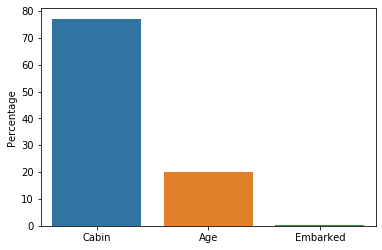

In [6]:
all_missing_percentage_plot_df(df)

In [23]:
del df['Cabin']

In [24]:
def Title_extract(df_name,ind):
    a,b = df_name[ind].index(',')+2,df_name[ind].index('.')
    return df_name[ind][a:b]
    

In [25]:
def Title_list(df_name):
    Title = []
    for i in range(len(df_name)):
        title = Title_extract(df_name,i)
        Title.append(title)
    return Title

In [26]:
dft = Title_list(df['Name'])

In [27]:
df['Title'] = dft

In [28]:
df['Family Size'] = (df['SibSp'] + df['Parch'])

In [29]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
Mme               1
the Countess      1
Ms                1
Capt              1
Lady              1
Sir               1
Jonkheer          1
Name: Title, dtype: int64

In [30]:
ti = list(df['Title'].value_counts().index)

In [31]:
ti

['Mr',
 'Miss',
 'Mrs',
 'Master',
 'Dr',
 'Rev',
 'Major',
 'Mlle',
 'Col',
 'Don',
 'Mme',
 'the Countess',
 'Ms',
 'Capt',
 'Lady',
 'Sir',
 'Jonkheer']

In [32]:
tn = ti[5:]

In [33]:
tn

['Rev',
 'Major',
 'Mlle',
 'Col',
 'Don',
 'Mme',
 'the Countess',
 'Ms',
 'Capt',
 'Lady',
 'Sir',
 'Jonkheer']

In [34]:
not_sure = [8]
no_sense = [4,5,6]
sure = []
new = [0,2,3,9,10,11]

royal_milt_titles = [2,3,9]
oth_tit = [0,10]

rename = [8,4,5,6,11]
rename_

In [113]:
def rename_inner(df,ti,ind,rep):
    for i in ind:
        orig = ti[i]
        df['Title'].replace(orig,rep,inplace = True)

def rename_title(df):
    ti = list(df['Title'].value_counts().index)
    
    royal = [6,8,11,15]
    oth_tit = [5,13]
    Mr = [9,16]
    Mrs = [14]
    Miss = [10,12]
    
    rename_inner(df,ti,royal,'Royal')
    rename_inner(df,ti,royal,'Other Title')
    rename_inner(df,ti,Mr,'Mr')
    rename_inner(df,ti,Mrs,'Mrs')
    rename_inner(df,ti,Miss,'Miss')
    
    Manual = [7]


In [114]:
rename_title(df)

In [117]:
df['Title'].value_counts()

Mr        519
Miss      184
Mrs       126
Master     40
Dr          7
Royal       6
Rev         6
Mlle        2
Capt        1
Name: Title, dtype: int64

In [112]:
df[df['Title'] == ti[16]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,Jonkheer,0


In [94]:
dmrs = df[df['Title'] == 'Mrs']
dms = df[df['Title'] == 'Miss']

In [95]:
dmrs.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
count,125.00000,125.000000,108.000000,125.000000,125.000000,125.000000,125.000000
mean,0.79200,2.000000,35.898148,0.696000,0.832000,45.138533,1.528000
std,0.40751,0.823055,11.433628,0.598708,1.274666,45.723716,1.347495
min,0.00000,1.000000,14.000000,0.000000,0.000000,7.225000,0.000000
25%,1.00000,1.000000,27.750000,0.000000,0.000000,15.850000,1.000000
50%,1.00000,2.000000,35.000000,1.000000,0.000000,26.000000,1.000000
75%,1.00000,3.000000,44.000000,1.000000,1.000000,57.000000,2.000000
max,1.00000,3.000000,63.000000,3.000000,6.000000,247.520800,7.000000


In [96]:
dms.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
count,182.000000,182.000000,146.000000,182.000000,182.000000,182.000000,182.000000
mean,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873,1.263736
std,0.460477,0.849989,12.990292,1.431961,0.804184,66.027199,1.999089
min,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000,0.000000
25%,0.000000,1.250000,14.125000,0.000000,0.000000,7.951050,0.000000
50%,1.000000,3.000000,21.000000,0.000000,0.000000,15.620850,0.000000
75%,1.000000,3.000000,30.000000,1.000000,1.000000,41.034400,2.000000
max,1.000000,3.000000,63.000000,8.000000,2.000000,512.329200,10.000000


In [36]:
dm = df[df['Title'] == 'Master']

In [37]:
dm

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,Master,4
16,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q,Master,5
50,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,S,Master,5
59,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,S,Master,7
63,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,S,Master,5
65,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C,Master,2
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,Master,2
125,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,C,Master,1
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,Master,10
164,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S,Master,5


In [38]:
dm[dm['Family Size'] <= 3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
65,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C,Master,2
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,Master,2
125,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,C,Master,1
165,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,S,Master,2
183,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S,Master,3
193,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,S,Master,2
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,Master,3
340,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,S,Master,2
348,1,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,S,Master,2
407,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,S,Master,2


In [39]:
dm[dm['Survived'] == 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
65,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C,Master,2
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,Master,2
125,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,C,Master,1
165,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,S,Master,2
183,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S,Master,3
193,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,S,Master,2
261,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.00,4,2,347077,31.3875,S,Master,6
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,Master,3
340,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,S,Master,2
348,1,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,S,Master,2


In [54]:
dm.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
count,40.000000,40.000000,36.000000,40.000000,40.000000,40.000000,40.000000
mean,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,3.675000
std,0.500641,0.627878,3.619872,1.910833,0.540062,28.051752,2.092569
min,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,18.750000,2.000000
50%,1.000000,3.000000,3.500000,1.000000,1.000000,29.062500,3.000000
75%,1.000000,3.000000,8.000000,4.000000,2.000000,39.171875,5.000000
max,1.000000,3.000000,12.000000,8.000000,2.000000,151.550000,10.000000


## Analyse age 10 to 20

In [55]:
d18m = df[df['Age'] < 18]

In [58]:
d_10_to_18 = d18m[d18m['Age'] > 12]

In [59]:
d_10_to_18

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,Miss,0
22,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q,Miss,0
39,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,C,Miss,1
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S,Miss,6
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S,Miss,7
84,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,S,Miss,0
86,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,S,Mr,4
111,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,C,Miss,1
114,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,C,Miss,0


In [43]:
dmr.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,0
12,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Mr,0
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,Mr,6
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Mr,0


In [52]:
dmr1 = dmr[dmr['Age'] <= 17]

In [53]:
dmr1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
86,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,S,Mr,4
138,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,S,Mr,0
163,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,S,Mr,0
220,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,S,Mr,0
266,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,S,Mr,5
282,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,S,Mr,0
333,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,S,Mr,2
352,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,C,Mr,2
433,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,S,Mr,0
500,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,S,Mr,0


In [60]:
import catboost
from catboost import CatBoostClassifier

,Percentage
Age,19.865320
Embarked,0.224467
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


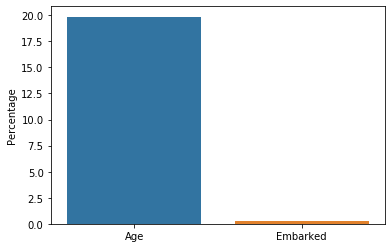

In [61]:
all_missing_percentage_plot_df(df)

In [62]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [63]:
df.corr()['Age']

Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Family Size   -0.301914
Name: Age, dtype: float64

In [65]:
df.corr()['SibSp']

Survived      -0.035322
Pclass         0.083081
Age           -0.308247
SibSp          1.000000
Parch          0.414838
Fare           0.159651
Family Size    0.890712
Name: SibSp, dtype: float64

## Asumption
Age = function(class,Title,Family Size,Parch,Fare)


## ML model to predict age

In [69]:
df_no_missing_age = df[df['Age'].isnull() == False]

In [71]:
df_no_missing_age.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [73]:
def data_set_for_ml(df,col_pred,list_cols):
    df_no_missing = df[df[col_pred].isnull() == False]
    df_missing = df[df[col_pred].isnull() == True]
    no_miss = df_no_missing[list_cols]
    miss = df_missing[list_cols]
    return miss,no_miss

In [74]:
m,n = data_set_for_ml(df,'Age',['Pclass','Title','Family Size','Parch','Fare'])

In [75]:
m.head()

,Pclass,Title,Family Size,Parch,Fare
5,3,Mr,0,0,8.4583
17,2,Mr,0,0,13.0000
19,3,Mrs,0,0,7.2250
26,3,Mr,0,0,7.2250
28,3,Miss,0,0,7.8792


In [76]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1
